In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings  
warnings.filterwarnings('ignore')

from TSForecasting.TsForecasting import TimeSeriesForecast

from TSForecasting.mage_calc import MageDataSet

Using TensorFlow backend.


In [2]:
obj = TimeSeriesForecast()

Object Created!


In [3]:
data = pd.read_csv("~/Desktop/NCSA_genomics/Python - notebooks/TSForecasting/Data/Hall/data_hall_raw.csv")
data['Display Time'] = pd.to_datetime(data['Display Time'])
df = data[data['subjectId']=='1636-69-032']
df=df.reset_index(drop=True)
print(df.dtypes)
display(df)

Display Time    datetime64[ns]
GlucoseValue             int64
subjectId               object
dtype: object


,Display Time,GlucoseValue,subjectId
0,2016-01-13 12:58:17,122,1636-69-032
1,2016-01-13 13:03:17,123,1636-69-032
2,2016-01-13 13:08:17,124,1636-69-032
3,2016-01-13 13:13:17,128,1636-69-032
4,2016-01-13 13:18:17,133,1636-69-032
...,...,...,...
1778,2016-01-19 17:12:49,101,1636-69-032
1779,2016-01-19 17:17:49,98,1636-69-032
1780,2016-01-19 17:22:49,101,1636-69-032
1781,2016-01-19 17:27:49,106,1636-69-032


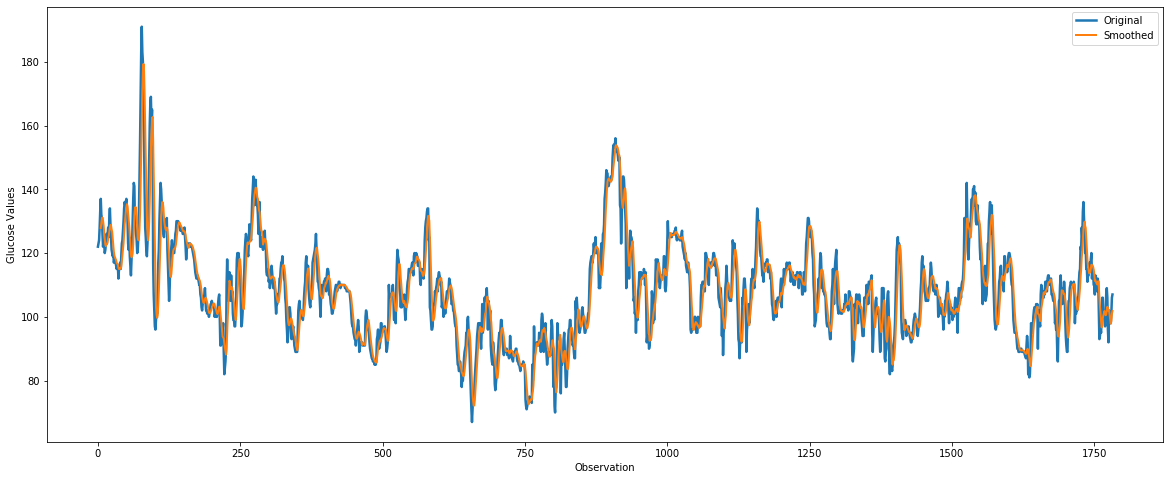

In [4]:
smoothened = obj.smoothing(df['GlucoseValue'])

plt.figure(figsize=(20, 8))

plt.plot(df['GlucoseValue'].tolist(), label='Original', linewidth=2.5)
plt.plot(smoothened, label='Smoothed', linewidth=2)
plt.xlabel('Observation')
plt.ylabel('Glucose Values')
plt.legend()

In [5]:
glucs = smoothened.to_list()
indices = [1*i for i in range(len(glucs))]
m = MageDataSet(indices, glucs)
k = m.getMAGE()
print("MAGE after smoothing:")
print(round(k,3))

MAGE after smoothing:
25.226


In [6]:
# df

In [7]:
# sampling data at 15 min. intervals
subsample = obj.subSample(df)
subsample

,Display Time,GlucoseValue,subjectId
0,2016-01-13 13:03:17,123,1636-69-032
1,2016-01-13 13:18:17,133,1636-69-032
2,2016-01-13 13:33:17,131,1636-69-032
3,2016-01-13 13:48:17,124,1636-69-032
4,2016-01-13 14:03:17,121,1636-69-032
...,...,...,...
590,2016-01-19 16:32:49,101,1636-69-032
591,2016-01-19 16:47:49,106,1636-69-032
592,2016-01-19 17:02:49,102,1636-69-032
593,2016-01-19 17:17:49,98,1636-69-032


In [8]:
# df

In [9]:
#converting data to mmols
#by default, the data is in mg
in_mmols = obj.convertUnits(df, 'mmol')
in_mmols


,Display Time,GlucoseValue,subjectId
0,2016-01-13 12:58:17,6.777778,1636-69-032
1,2016-01-13 13:03:17,6.833333,1636-69-032
2,2016-01-13 13:08:17,6.888889,1636-69-032
3,2016-01-13 13:13:17,7.111111,1636-69-032
4,2016-01-13 13:18:17,7.388889,1636-69-032
...,...,...,...
1778,2016-01-19 17:12:49,5.611111,1636-69-032
1779,2016-01-19 17:17:49,5.444444,1636-69-032
1780,2016-01-19 17:22:49,5.611111,1636-69-032
1781,2016-01-19 17:27:49,5.888889,1636-69-032


In [10]:
#converting data to mg
in_mgs = obj.convertUnits(in_mmols, 'mg')
in_mgs

,Display Time,GlucoseValue,subjectId
0,2016-01-13 12:58:17,122.0,1636-69-032
1,2016-01-13 13:03:17,123.0,1636-69-032
2,2016-01-13 13:08:17,124.0,1636-69-032
3,2016-01-13 13:13:17,128.0,1636-69-032
4,2016-01-13 13:18:17,133.0,1636-69-032
...,...,...,...
1778,2016-01-19 17:12:49,101.0,1636-69-032
1779,2016-01-19 17:17:49,98.0,1636-69-032
1780,2016-01-19 17:22:49,101.0,1636-69-032
1781,2016-01-19 17:27:49,106.0,1636-69-032


In [11]:
# df

In [12]:
#extracting data of only full days
df_fullDay = obj.full_days(df)
df_fullDay

,Display Time,GlucoseValue,subjectId
0,2016-01-14 00:03:15,120,1636-69-032
1,2016-01-14 00:08:15,120,1636-69-032
2,2016-01-14 00:13:15,123,1636-69-032
3,2016-01-14 00:18:15,126,1636-69-032
4,2016-01-14 00:23:15,127,1636-69-032
...,...,...,...
1434,2016-01-18 23:37:52,136,1636-69-032
1435,2016-01-18 23:42:52,126,1636-69-032
1436,2016-01-18 23:47:52,132,1636-69-032
1437,2016-01-18 23:52:52,135,1636-69-032


In [13]:
#starting with all GVI's

In [14]:
gfi, gcf = obj.gfi(df)
print("GFI: "+str(gfi)+"\nGCF: "+str(gcf))
# gfi, gcf

GFI: 4.0333908606292255
GCF: 0.03769915917071296


In [15]:
LBGI, HBGI, BGRI = obj.bgri(df, units = 'mg')
# LBGI, HBGI, BGRI
print("LBGI: "+str(LBGI)+"\nHBGI: "+str(HBGI)+"\nBGRI: "+str(BGRI))

LBGI: 0.6027147643468638
HBGI: 0.14139436909889394
BGRI: 0.7441091334457577


In [16]:
GRADE , HypoG_P, EuG_P, HyperG_P = obj.grade(df, units='mg')
# GRADE , HypoG_P, EuG_P, HyperG_P
print("GRADE: "+str(GRADE)+"\nHypoG_P: "+str(HypoG_P)+"\nEuG_P: "+str(EuG_P)+"\nHyperG_P: "+str(HyperG_P))

GRADE: 194.18345998623013
HypoG_P: 0.06949270326615706
EuG_P: 97.63724808895066
HyperG_P: 2.2932592077831826


In [17]:
j = obj.j_index(df, units="mg")
# j
print("J - Index: "+str(j))

J - Index: 14.716521756499343


In [18]:
Mvalue = obj.m_value(df, 'mg', 120)
# Mvalue
print("M - Value: "+str(Mvalue))

M - Value: 9.342104950850654


In [19]:
MAG = obj.mag(df)
# MAG
print("MAG: "+str(MAG))

MAG: 0.06671654964244099


In [20]:
GVP = obj.gvp(df, units='mg')
# GVP
print("GVP: "+str(GVP))

GVP: 22.523638503823882


In [21]:
GMI = obj.gmi(df, units='mg')
# GMI
print("GMI: "+str(GMI))

GMI: 5.86917403752606


In [22]:
LAGE, MAX, MIN = obj.lage(df)
# LAGE, MAX, MIN
print("LAGE: "+str(LAGE)+"\nMAX: "+str(MAX)+"\nMIN: "+str(MIN))

LAGE: 89
MAX: 156
MIN: 67


In [23]:
HBA1C = obj.ehba1c(df)
# HBA1C
print("HBA1C: "+str(HBA1C))

HBA1C: 5.355013281096774


In [24]:
m, sd, cv, iqr = obj.sumstats(df)
# m, sd, cv, iqr
print("Mean: "+str(m)+"\nStd. Dev."+str(sd)+"\nCV: "+str(cv)+"\nIQR: "+str(iqr))

Mean: 106.98888116747742
Std. Dev.14.322790803934074
CV: 0.13387176917490684
IQR: 19.0


In [25]:
sdrc = obj.rc(df)
# sdrc
print("SDRC: "+str(sdrc))

SDRC: 0.8050647192239375


In [26]:
data = pd.read_csv("~/Desktop/NCSA_genomics/Python - notebooks/TSForecasting/Data/consolidatedDataForPackage.csv")
print(data.dtypes)
display(data)

Display Time     object
GlucoseValue    float64
subjectId        object
dtype: object


,Display Time,GlucoseValue,subjectId
0,2016-06-21 00:00:00,197.0,GVP01
1,2016-06-21 00:15:00,208.0,GVP01
2,2016-06-21 00:30:00,226.0,GVP01
3,2016-06-21 00:45:00,241.0,GVP01
4,2016-06-21 01:00:00,250.0,GVP01
...,...,...,...
316522,2025-06-28 23:36:00,206.0,OD584
316523,2025-06-28 23:41:00,208.0,OD584
316524,2025-06-28 23:46:00,213.0,OD584
316525,2025-06-28 23:51:00,224.0,OD584


In [27]:
obj.dataDescribe(data)

Here is a glimpse of the data:

         Display Time  GlucoseValue subjectId
0 2016-06-21 00:00:00         197.0     GVP01
1 2016-06-21 00:15:00         208.0     GVP01
2 2016-06-21 00:30:00         226.0     GVP01
3 2016-06-21 00:45:00         241.0     GVP01
4 2016-06-21 01:00:00         250.0     GVP01

Total Readings in the data:316527






NameError: name 'dadata_descriptionta' is not defined

In [ ]:
obj.gvIndices(data)